##Principal component analysis PCA

In [1]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Load the data

In [3]:

# Load data
data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/atrium_SDA+ASE_v2_2969_samples.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
#data = data.dropna(axis=0)


### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [4]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  3000 non-null   float64
 1   typicalFacadeWindowWidth   3000 non-null   int64  
 2   groundFacadeGlazingRatio   3000 non-null   float64
 3   groundFacadeWindowWidth    3000 non-null   int64  
 4   buildingDepth              3000 non-null   int64  
 5   balconyWidth               3000 non-null   int64  
 6   atriumArea                 3000 non-null   int64  
 7   aspectRatio                3000 non-null   float64
 8   groundFloorHeight          3000 non-null   float64
 9   typicalfloorHeight         3000 non-null   float64
 10  numberLevels               3000 non-null   int64  
 11  groundSDA                  2983 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2985 non-null   float

In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2969 non-null   float64
 1   typicalFacadeWindowWidth   2969 non-null   int64  
 2   groundFacadeGlazingRatio   2969 non-null   float64
 3   groundFacadeWindowWidth    2969 non-null   int64  
 4   buildingDepth              2969 non-null   int64  
 5   balconyWidth               2969 non-null   int64  
 6   atriumArea                 2969 non-null   int64  
 7   aspectRatio                2969 non-null   float64
 8   groundFloorHeight          2969 non-null   float64
 9   typicalfloorHeight         2969 non-null   float64
 10  numberLevels               2969 non-null   int64  
 11  groundSDA                  2969 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2969 non-null   float

In [6]:
# Print the first 5 rows
data.head()

,typicalFacadeGlazingRatio,typicalFacadeWindowWidth,groundFacadeGlazingRatio,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE
0,0.800,4,0.800,4,21,3,2300,1.300,5.000,3.000,8,100.000,37.000,21.800,12.200
1,0.900,4,0.800,3,38,2,1300,1.500,4.500,2.600,7,49.800,23.100,13.700,8.000
2,0.800,3,0.800,4,34,4,2100,1.400,5.600,2.800,5,80.500,23.900,19.600,8.200
3,0.700,2,0.800,2,16,5,1200,0.700,5.000,2.600,10,100.000,36.000,28.100,10.800
4,0.700,2,0.800,2,32,4,3700,1.300,5.000,2.800,6,71.600,23.700,17.700,6.900


In [7]:
# Descriptive statistics
data.describe()

,typicalFacadeGlazingRatio,typicalFacadeWindowWidth,groundFacadeGlazingRatio,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE
count,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000
mean,0.801,2.996,0.801,3.008,27.465,3.502,2454.059,1.005,4.508,2.750,5.437,75.403,34.788,20.718,11.837
std,0.071,0.812,0.071,0.819,7.482,1.712,857.638,0.291,0.857,0.150,2.874,22.962,12.768,7.445,4.293
min,0.700,2.000,0.700,2.000,15.000,1.000,1000.000,0.500,3.000,2.500,1.000,26.100,15.200,5.600,5.000
25%,0.800,2.000,0.800,2.000,21.000,2.000,1700.000,0.800,3.800,2.600,3.000,54.600,25.800,15.500,8.800
50%,0.800,3.000,0.800,3.000,27.000,3.000,2400.000,1.000,4.500,2.800,5.000,77.800,31.700,19.300,10.900
75%,0.900,4.000,0.900,4.000,34.000,5.000,3200.000,1.300,5.300,2.900,8.000,99.900,40.000,24.600,13.900
max,0.900,4.000,0.900,4.000,40.000,6.000,3900.000,1.500,6.000,3.000,10.000,100.000,100.000,64.400,34.400


In [8]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data, hue='aspectRatio')

Output hidden; open in https://colab.research.google.com to view.

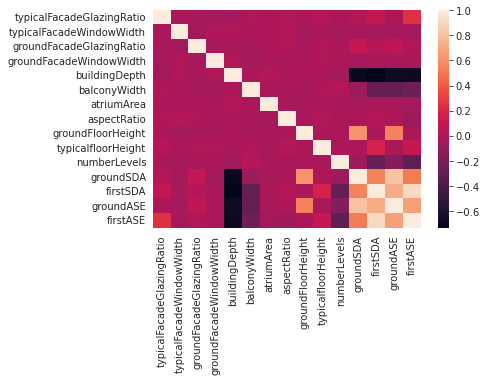

In [9]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

In [10]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
#data_num = data.drop(columns = 'species')
data_num = data

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [13]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data_num.columns).describe()

,typicalFacadeGlazingRatio,typicalFacadeWindowWidth,groundFacadeGlazingRatio,groundFacadeWindowWidth,buildingDepth,balconyWidth,atriumArea,aspectRatio,groundFloorHeight,typicalfloorHeight,numberLevels,groundSDA,firstSDA,groundASE,firstASE
count,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000,2969.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.418,-1.227,-1.421,-1.232,-1.666,-1.462,-1.696,-1.734,-1.759,-1.662,-1.544,-2.148,-1.534,-2.031,-1.593
25%,-0.010,-1.227,-0.017,-1.232,-0.864,-0.877,-0.879,-0.704,-0.825,-0.996,-0.848,-0.906,-0.704,-0.701,-0.708
50%,-0.010,0.005,-0.017,-0.010,-0.062,-0.293,-0.063,-0.018,-0.009,0.336,-0.152,0.104,-0.242,-0.190,-0.218
75%,1.397,1.237,1.387,1.212,0.874,0.875,0.870,1.012,0.925,1.002,0.892,1.067,0.408,0.521,0.481
max,1.397,1.237,1.387,1.212,1.676,1.460,1.686,1.698,1.741,1.668,1.588,1.071,5.108,5.868,5.257


### Executing PCA

In [14]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [15]:
# Fit the model
model.fit(data_scaled)

PCA()

In [16]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
data_num_reduced_df = pd.DataFrame(data_reduced)
#data_num_reduced_df["species"] = data["species"]

print(data_num_reduced_df)

         0      1      2      3      4      5      6      7      8      9   \
0     1.052 -0.476  0.619  2.134  0.753 -0.855  0.468  0.993 -0.707  0.090   
1    -2.178  0.064 -0.077  1.646 -0.577  0.662 -1.013 -1.015 -1.676 -1.651   
2    -0.870 -1.384 -0.245  1.792 -0.169  0.203  0.746  0.009 -0.169 -0.369   
3     1.170 -2.088  1.484 -1.857  1.446 -0.605 -0.357 -1.694  0.391  0.502   
4    -1.395 -1.299 -0.125 -0.298  0.301  1.364 -0.326  0.551  0.074  2.143   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2964 -0.375 -0.630 -0.917 -0.946  0.625 -3.100 -0.840  0.876 -0.490  0.488   
2965 -0.389 -0.518  1.258 -0.681 -0.162  0.054 -1.226 -0.699  0.863 -0.174   
2966  0.624 -0.728  0.557  0.056  1.532  0.536  0.368 -0.695 -0.038 -1.646   
2967 -1.489  1.093  0.061  0.302 -0.029 -0.033  0.490  1.372 -2.112 -0.634   
2968 -1.502  1.303  1.990 -2.321 -0.095 -1.014 -0.661 -1.325  0.189  0.655   

         10     11     12     13     14  
0     0.463 -0.549  0

### Inspecting Results

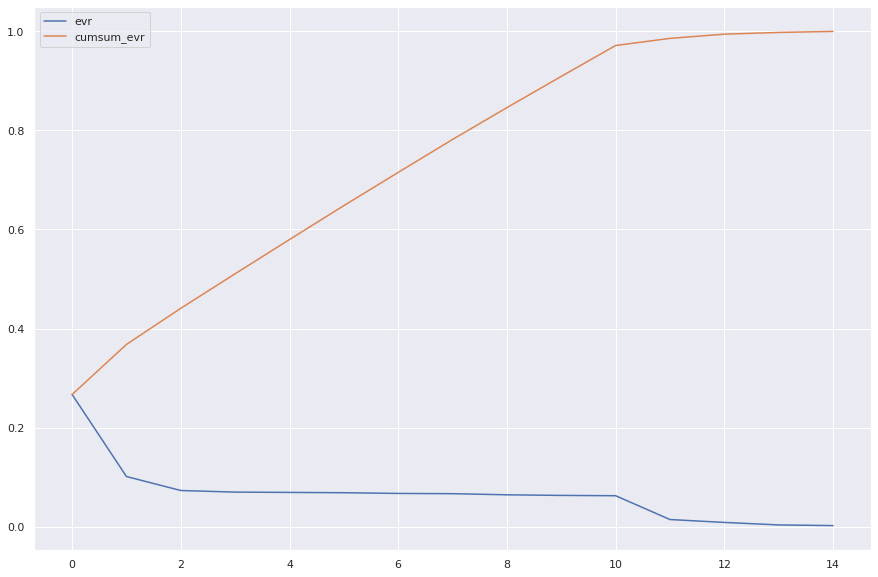

In [17]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [18]:
print(model.explained_variance_ratio_)

[0.26681252 0.10117022 0.07294238 0.06973386 0.06911064 0.06848221
 0.06704325 0.06653614 0.06426964 0.06306702 0.06241256 0.01435299
 0.00850581 0.00345249 0.00210828]


PLOTTING ALL THE PCS

In [19]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)
    
    n = coeff.shape[0]
    
    
    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"] 
        df["ys"] = scaley * df["ys"] 
    
    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data_num.columns[i], color = 'r', ha = 'center', va = 'center', alpha = 0.9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

No handles with labels found to put in legend.


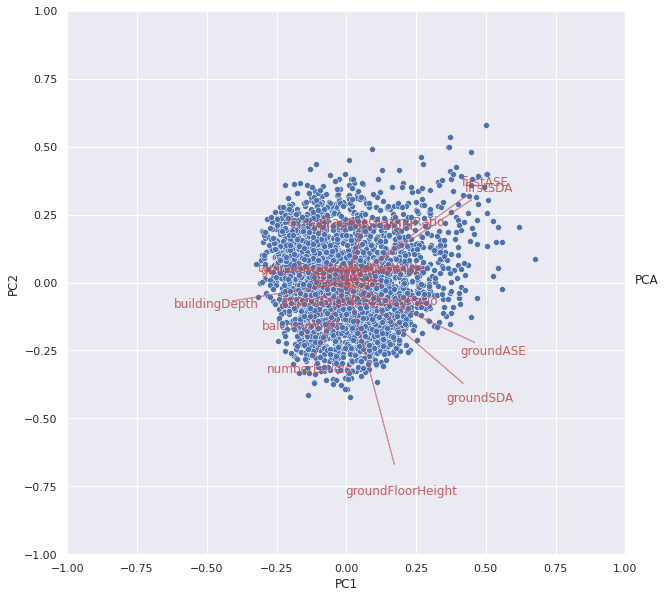

In [20]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()
fig.set_size_inches(10, 10)
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [21]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

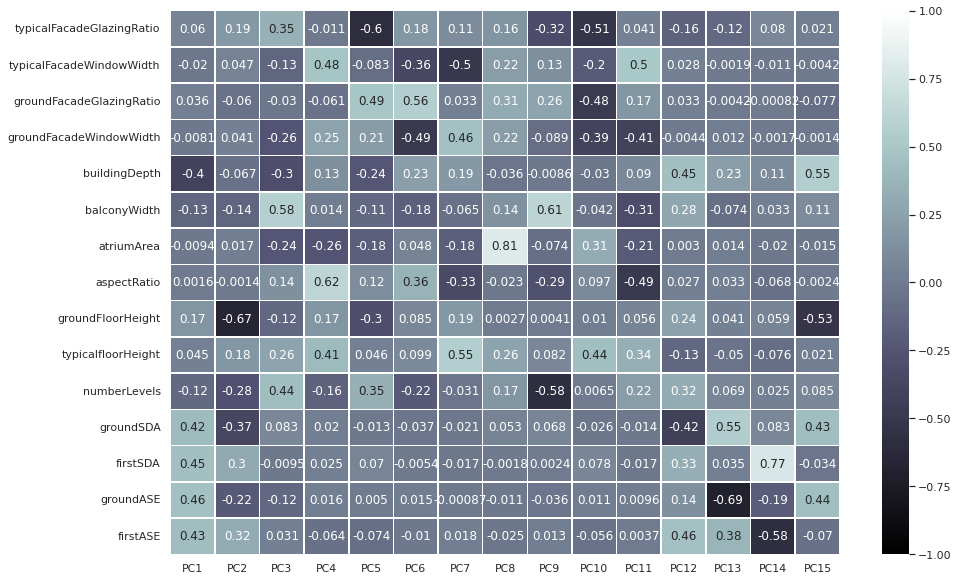

In [22]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [23]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_num.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                          1
0    PC0                  groundASE
1    PC1          groundFloorHeight
2    PC2               balconyWidth
3    PC3                aspectRatio
4    PC4  typicalFacadeGlazingRatio
5    PC5   groundFacadeGlazingRatio
6    PC6         typicalfloorHeight
7    PC7                 atriumArea
8    PC8               balconyWidth
9    PC9  typicalFacadeGlazingRatio
10  PC10   typicalFacadeWindowWidth
11  PC11                   firstASE
12  PC12                  groundASE
13  PC13                   firstSDA
14  PC14              buildingDepth
